# Final Project 1

In [35]:
import numpy as np
import sep

additional setup for reading the test image and displaying plots

In [36]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

read image into standard 2-d numpy array

In [37]:
data = fits.getdata('image.fits', ext = 0)

show the image

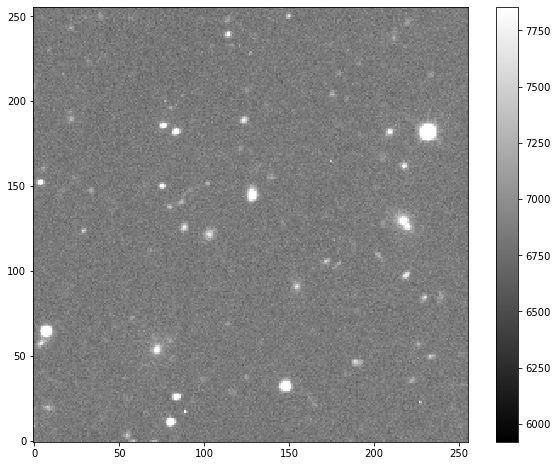

In [38]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation = 'nearest', cmap = 'gray', vmin = m - s, vmax = m + s, origin = 'lower')
plt.colorbar()
plt.savefig('Final_Project_Tutorial_Figure_1.png', dpi = 300)

measure a spatially varying background on the image

In [39]:
bkg = sep.Background(data)

get a "global" mean and noise of the image background:

In [40]:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


evaluate background as 2-d array, same size as original image

In [41]:
bkg_image = bkg.back()

bkg_image = np.array(bkg) # equivalent to above

show the background

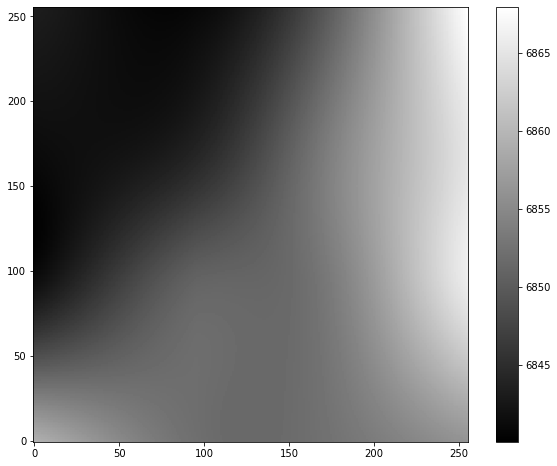

In [42]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('Final_Project_Tutorial_Figure_2.png', dpi = 300)

evaluate the background noise as 2-d array, same size as original image

In [43]:
bkg_rms = bkg.rms()

show the background noise

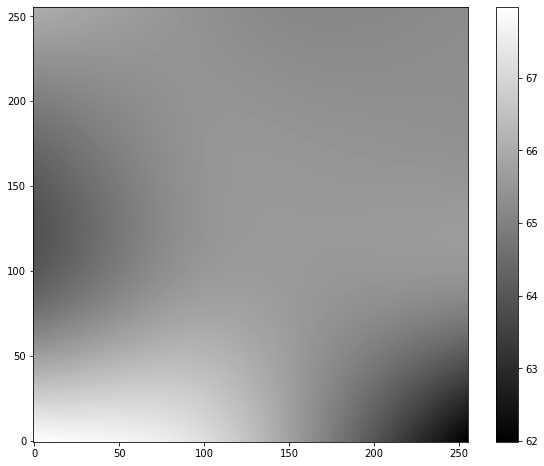

In [44]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('Final_Project_Tutorial_Figure_3.png', dpi = 300)

subtract the background

In [45]:
data_sub = data - bkg

In [46]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

how many objects were detected

In [47]:
len(objects)

68

In [48]:
from matplotlib.patches import Ellipse

plot background-subtracted image

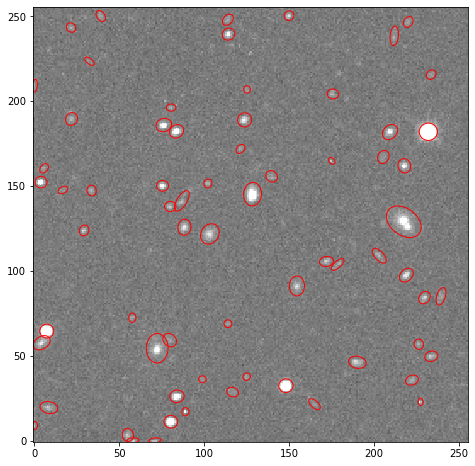

In [49]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')
# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
plt.savefig('Final_Project_Tutorial_Figure_4.png', dpi = 300)

available fields

In [50]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [51]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

show the first 10 objects results:

In [52]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
